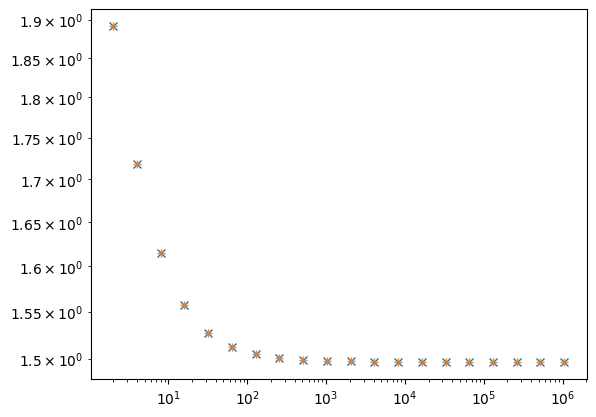

In [3]:
import numpy as np
import matplotlib.pyplot as plt

j_range = np.arange(20) + 1
n_range = 2 ** j_range


def s(n):
    ret = 0
    for k in (np.arange(n) + 1):
        ret += 1 / k ** 2
    return ret


def s_rev(n):
    ret = 0
    for k in (n - np.arange(n)):
        ret += 1 / k ** 2
    return ret


s_vec = np.vectorize(s)
s_rev_vec = np.vectorize(s_rev)

s_ret = s_vec(n_range)
s_rev_ret = s_rev_vec(n_range)
deviation = abs(s_ret - np.pi)
deviation_rev = abs(s_rev_ret - np.pi)

fig, ax = plt.subplots()

ax.loglog(n_range, deviation, 'x')
ax.loglog(n_range, deviation_rev, '+')

# fig.savefig('U01_2.pdf')